In [7]:
from MITRotor.FlorisInterface.FlorisInterface import csv_to_interp, MITRotorTurbine
from floris import FlorisModel, TimeSeries
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def check_interp(tsr_csv, pitch_csv):
    tsr_interp = csv_to_interp(tsr_csv)
    pitch_interp = csv_to_interp(pitch_csv)
    print(type(pitch_interp))
    # interp values
    x_interp_vals = np.linspace(0, 25, num=100)
    tsr_interp_vals = tsr_interp(x_interp_vals)
    pitch_interp_vals = pitch_interp(x_interp_vals)
    # actual values
    tsr_data = np.loadtxt(tsr_csv, delimiter=",", skiprows=1)
    pitch_data = np.loadtxt(pitch_csv, delimiter=",", skiprows=1)
    # plot
    plt.plot(x_interp_vals, tsr_interp_vals, label = "TSR Interpolation")
    plt.plot(x_interp_vals, pitch_interp_vals, label = "Pitch Interpolation")
    plt.scatter(tsr_data[:, 0], tsr_data[:, 1], label = "TSR Data")
    plt.scatter(pitch_data[:, 0], pitch_data[:, 1], label = "Pitch Data")
    plt.legend()

<class 'scipy.interpolate._interpolate.interp1d'>


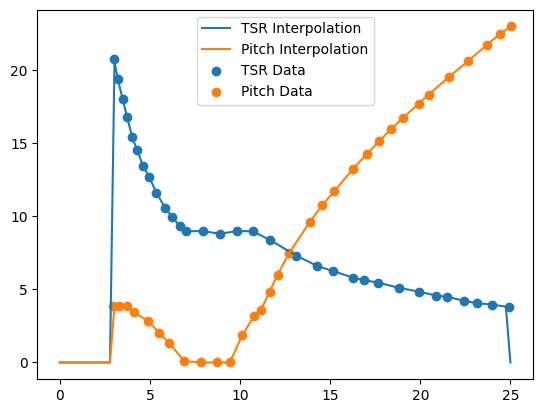

In [9]:
tsr_15mw_csv = "/Users/sky/src/HowlandLab/MITRotor/MITRotor/FlorisInterface/tsr_15mw.csv"
pitch_15mw_csv = "/Users/sky/src/HowlandLab/MITRotor/MITRotor/FlorisInterface/pitch_15mw.csv"
check_interp(tsr_15mw_csv, pitch_15mw_csv)

<class 'scipy.interpolate._interpolate.interp1d'>


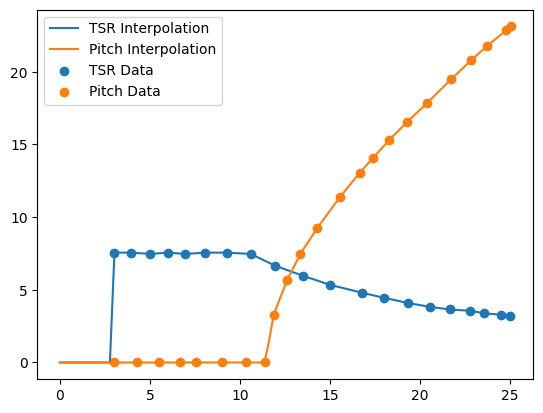

In [10]:
tsr_15mw_csv = "/Users/sky/src/HowlandLab/MITRotor/MITRotor/FlorisInterface/tsr_5mw.csv"
pitch_15mw_csv = "/Users/sky/src/HowlandLab/MITRotor/MITRotor/FlorisInterface/pitch_5mw.csv"
check_interp(tsr_15mw_csv, pitch_15mw_csv)

In [11]:
from floris.core.turbine.unified_momentum_model import UnifiedMomentumModelTurbine
from floris import FlorisModel

fmodel = FlorisModel("defaults")

time_series = TimeSeries(
    wind_directions=np.array([270.0, 270.0, 280.0]),
    wind_speeds=np.array([8.0, 10.0, 12.0]),
    turbulence_intensities=np.array([0.06, 0.06, 0.06]),
)

fmodel.set(
    layout_x = [0.0, 500.0],
    layout_y = [0.0, 0.0],
    wind_data=time_series,
)

fmodel.run()

print("Powers [W]:\n", fmodel.get_turbine_powers(), "\n")
print("Thrust coefficients [-]:\n", fmodel.get_turbine_thrust_coefficients(), "\n")
print("Axial induction factors [-]:\n", fmodel.get_turbine_axial_induction_factors(), "\n")

Powers [W]:
 [[1753954.45917917  354990.76412771]
 [3417797.00509157  737171.66537995]
 [5000000.         4927707.14320011]] 

Thrust coefficients [-]:
 [[0.78715145 0.9353766 ]
 [0.78387889 0.86092059]
 [0.55092883 0.74517368]] 

Axial induction factors [-]:
 [[0.26932244 0.37289433]
 [0.26755586 0.31353324]
 [0.16493614 0.24759837]] 



/Users/sky/Library/Caches/pypoetry/virtualenvs/mitrotor-l4Gn_-ln-py3.12/lib/python3.12/site-packages/floris/core/flow_field.py:172: UserWarning: 'where' used without 'out', expect unitialized memory in output. If this is intentional, use out=None.
  * np.power(


In [ ]:
from floris import FlorisModel, TimeSeries

fmodel = FlorisModel("defaults")

time_series = TimeSeries(
    wind_directions=np.array([270.0, 270.0, 280.0]),
    wind_speeds=np.array([8.0, 10.0, 12.0]),
    turbulence_intensities=np.array([0.06, 0.06, 0.06]),
)

yaw_angles = np.array([
    [10.0, 0.0],   # condition 1
    [10.0, 0.0],   # condition 2
    [10.0, 0.0],   # condition 3
])

fmodel.set(
    layout_x = [0.0, 500.0],
    layout_y = [0.0, 0.0],
    wind_data = time_series,
    yaw_angles = yaw_angles
)

fmodel.set_operation_model(MITRotorTurbine())
fmodel.run()

print("Powers [W]:\n", fmodel.get_turbine_powers(), "\n")
print("Thrust coefficients [-]:\n", fmodel.get_turbine_thrust_coefficients(), "\n")
print("Axial induction factors [-]:\n", fmodel.get_turbine_axial_induction_factors(), "\n")

Powers [W]:
 [[ -80385.81346439   35955.07110895]
 [-151917.60066      85753.35035653]
 [-190271.12187713  332785.69634393]] 

Thrust coefficients [-]:
 [[0.73380279 0.74621482]
 [0.66198028 0.74239241]
 [0.41175519 0.5029464 ]] 

Axial induction factors [-]:
 [[0.34782061 0.35018336]
 [0.30308838 0.35179638]
 [0.18725075 0.22345784]] 

